# CLASSIFYING SONGS WITH ML AND DL

From the CSV document created in DATASET, we are going to model the data for passing it to ML and DL models, and get insights previously about the information that give us the data. First, we are going to import the necessary libraries:

In [92]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib as plt
import seaborn as sns

In [93]:
atracks = pd.read_csv('/Users/seed/Desktop/git/Classification/spotify_analysis/spotify_tracks', index_col=[0])

atracks.head()

,artist_id,artist_name,track_id,track_name,album_id,album_name,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,uri,track_href,analysis_url,duration_ms,time_signature,label
0,56n1NeXsTOOxjX3Z4lVMTJ,SFDK,4HSUcBiPq6e9fsYv5q1yvg,El Niño Güei,1Nux8B69WySS5XMMprdgL3,2005,0.873,0.508,6,-5.564,...,0.000000,0.0609,0.694,89.956,spotify:track:4HSUcBiPq6e9fsYv5q1yvg,https://api.spotify.com/v1/tracks/4HSUcBiPq6e9...,https://api.spotify.com/v1/audio-analysis/4HSU...,289200,4,hip-hop
1,1jLIRfWqZf402sVJzCVVNc,Go Hiyama,2q5Z0l8sJkvwTGIwVTq0nS,C - Reeko Remix,5aHgA6VigO9vXotfvR9EdL,Crispy Bites EP,0.743,0.949,1,-6.188,...,0.888000,0.0309,0.326,138.028,spotify:track:2q5Z0l8sJkvwTGIwVTq0nS,https://api.spotify.com/v1/tracks/2q5Z0l8sJkvw...,https://api.spotify.com/v1/audio-analysis/2q5Z...,396522,4,techno
2,56n1NeXsTOOxjX3Z4lVMTJ,SFDK,4aWrVBft7jEHE10aADrg4p,Sin Miedo a Vivir,0Tp6yhqsb5UekzoUSBtxZK,Sin Miedo a Vivir (Extended Version),0.660,0.873,0,-7.349,...,0.000000,0.3170,0.759,97.038,spotify:track:4aWrVBft7jEHE10aADrg4p,https://api.spotify.com/v1/tracks/4aWrVBft7jEH...,https://api.spotify.com/v1/audio-analysis/4aWr...,193013,4,hip-hop
3,7kaC28XGoTp1ViSZAA0iuX,Jossef,28TkGcDuxQlbjo6rJEjh7e,Una Noche,3ixuEcCz3Cha9FTolbdmFM,Una Noche,0.648,0.738,0,-4.903,...,0.000511,0.0975,0.290,179.997,spotify:track:28TkGcDuxQlbjo6rJEjh7e,https://api.spotify.com/v1/tracks/28TkGcDuxQlb...,https://api.spotify.com/v1/audio-analysis/28Tk...,192667,4,reggaeton
4,6Unmr1mmDxRqZY7jkSQOcg,Snts,2NIbNluHtEOlpYBuo0T7XV,NO JVSTIFIED RESENTMENTS,3AlgTOV86TxYwEcrDT4ozE,EVOKED RVPTVRE,0.388,0.998,6,-8.848,...,0.655000,0.5100,0.174,137.007,spotify:track:2NIbNluHtEOlpYBuo0T7XV,https://api.spotify.com/v1/tracks/2NIbNluHtEOl...,https://api.spotify.com/v1/audio-analysis/2NIb...,341733,4,techno


In [94]:
atracks.label.value_counts() # The data is balanced 

reggaeton    500
rock         500
techno       500
hip-hop      500
jazz         494
Name: label, dtype: int64

In [95]:
atracks.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494 entries, 0 to 2493
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_id         2494 non-null   object 
 1   artist_name       2493 non-null   object 
 2   track_id          2494 non-null   object 
 3   track_name        2493 non-null   object 
 4   album_id          2494 non-null   object 
 5   album_name        2493 non-null   object 
 6   danceability      2494 non-null   float64
 7   energy            2494 non-null   float64
 8   key               2494 non-null   int64  
 9   loudness          2494 non-null   float64
 10  mode              2494 non-null   int64  
 11  speechiness       2494 non-null   float64
 12  acousticness      2494 non-null   float64
 13  instrumentalness  2494 non-null   float64
 14  liveness          2494 non-null   float64
 15  valence           2494 non-null   float64
 16  tempo             2494 non-null   float64


In [96]:
 atracks.label.replace({'techno':0, 'reggaeton':1, 'hip-hop':2, 'rock':3, 'jazz':4}, inplace=True) # We are going to assign numerical labels for every genre

In [97]:
atracks.corr().style.background_gradient(cmap='PuBu')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,label
danceability,1.000000,0.319127,0.060655,0.452680,-0.096751,0.364385,-0.384158,-0.243700,-0.167389,0.344137,-0.093957,-0.187617,0.143318,-0.560840
energy,0.319127,1.000000,0.084090,0.798393,-0.018976,0.177332,-0.752788,-0.216521,0.024856,0.295614,0.235503,-0.114615,0.098677,-0.597308
key,0.060655,0.084090,1.000000,0.049291,-0.202366,0.025674,-0.055819,0.010506,-0.030386,0.035657,-0.008569,-0.001331,-0.032488,-0.091588
loudness,0.452680,0.798393,0.049291,1.000000,-0.009566,0.290598,-0.675498,-0.564943,0.003177,0.436237,0.140518,-0.210049,0.175627,-0.431674
mode,-0.096751,-0.018976,-0.202366,-0.009566,1.000000,-0.039073,-0.017061,0.000970,0.006149,-0.073123,-0.003068,-0.009180,-0.008033,0.075851
speechiness,0.364385,0.177332,0.025674,0.290598,-0.039073,1.000000,-0.164607,-0.330482,-0.001629,0.260254,-0.029926,-0.165186,0.097603,-0.191005
acousticness,-0.384158,-0.752788,-0.055819,-0.675498,-0.017061,-0.164607,1.000000,0.247765,0.077139,-0.169244,-0.218110,0.104264,-0.103726,0.566295
instrumentalness,-0.243700,-0.216521,0.010506,-0.564943,0.000970,-0.330482,0.247765,1.000000,-0.007028,-0.548866,0.069778,0.327085,-0.165584,-0.155107
liveness,-0.167389,0.024856,-0.030386,0.003177,0.006149,-0.001629,0.077139,-0.007028,1.000000,0.035880,-0.011227,0.148186,0.014174,0.166057
valence,0.344137,0.295614,0.035657,0.436237,-0.073123,0.260254,-0.169244,-0.548866,0.035880,1.000000,-0.034068,-0.322965,0.139357,0.038505


In [98]:
count = atracks.groupby(by='label').mean() # mean values for every feature for label

count

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
label,,,,,,,,,,,,,
0,0.651656,0.798496,5.9320,-10.500254,0.57000,0.086551,0.115810,1.410830e-05,0.157971,0.227616,132.339310,362819.132000,3.816000
1,0.745368,0.755000,5.4420,-5.103232,0.48800,0.130903,0.194412,8.508048e-08,0.195818,0.674613,125.572646,234187.320000,4.002000
2,0.732230,0.695048,5.6720,-6.339030,0.51400,0.241632,0.191981,1.586201e-07,0.199132,0.618452,110.470990,244267.628000,3.994000
3,0.466134,0.736386,5.2300,-7.384390,0.75000,0.057269,0.194729,2.068287e-06,0.227567,0.511038,124.549260,256192.676000,3.930000
4,0.444392,0.258271,4.8583,-18.538929,0.57085,0.051477,0.770416,9.534082e-06,0.252006,0.344305,109.443852,385749.161943,3.834008


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb664f18d50>,
      dtype=object)

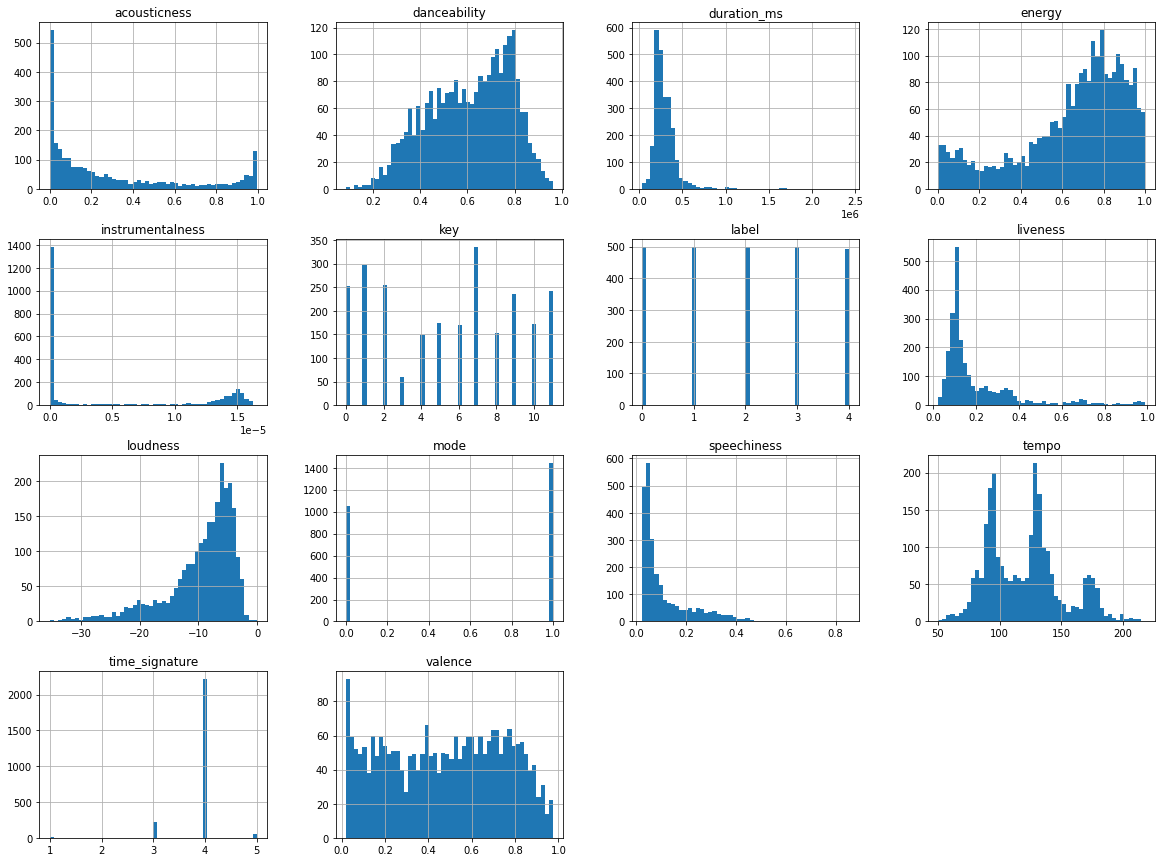

In [119]:
atracks.hist(bins=50, figsize=(20,15)) # Rapid view to see distributions

We are going to split the dataset into the predictor columns and columns that only gives us information about the track:

In [100]:
information = atracks.select_dtypes(include='object')

features = atracks.select_dtypes(include=['int','float'])

In [101]:
information.columns

Index(['artist_id', 'artist_name', 'track_id', 'track_name', 'album_id',
       'album_name', 'uri', 'track_href', 'analysis_url'],
      dtype='object')

In [102]:
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'label'],
      dtype='object')

There are some numerical feature that his values are between 0 and 1, so for the rest that isn't we are goin to use min-max scaler to transform the values into this range:

In [103]:
categorical = features[['key', 'time_signature', 'mode', 'label']]

numerical =  features[['danceability', 'energy', 'loudness', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']]

In [104]:
numerical['loudness'] = numerical.loudness.apply(lambda x: (x-numerical.loudness.min())/(numerical.loudness.max()-numerical.loudness.min()))

print(numerical.loudness.min(), numerical.loudness.max())

0.0 1.0


In [105]:
numerical['valence'] = numerical.valence.apply(lambda x: x-numerical.valence.min()/numerical.valence.max()-numerical.valence.min())

print(numerical.valence.min(), numerical.valence.max())

-0.02030769230769231 0.9348923076923076


In [106]:
numerical['duration_ms'] = numerical.duration_ms.apply(lambda x: (x-numerical.duration_ms.min())/(numerical.duration_ms.max()-numerical.duration_ms.min()))

print(numerical.duration_ms.min(), numerical.duration_ms.max())

0.0 1.0


In [107]:
numerical['tempo'] = numerical.tempo.apply(lambda x: (x-numerical.tempo.min())/(numerical.tempo.max()-numerical.tempo.min()))

print(numerical.tempo.min(), numerical.tempo.max())

0.0 1.0


This is how looks the numerical values after the previous trtansformations:

In [108]:
numerical.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.873,0.508,0.843718,0.3170,0.079900,0.000000e+00,0.0609,0.653892,0.237352,0.106898
1,0.743,0.949,0.826045,0.1240,0.002240,1.480000e-05,0.0309,0.285892,0.523871,0.151759
2,0.660,0.873,0.793163,0.2050,0.103000,0.000000e+00,0.3170,0.718892,0.279563,0.066691
3,0.648,0.738,0.862439,0.0536,0.110000,8.516667e-09,0.0975,0.249892,0.774014,0.066547
4,0.388,0.998,0.750708,0.0864,0.002610,1.091667e-05,0.5100,0.133892,0.517785,0.128857
...,...,...,...,...,...,...,...,...,...,...
2489,0.722,0.639,0.804209,0.3730,0.000917,4.650000e-10,0.3520,0.283892,0.243408,0.127375
2490,0.705,0.739,0.811431,0.4380,0.629000,0.000000e+00,0.0857,0.881892,0.237770,0.071702
2491,0.705,0.378,0.622295,0.0573,0.023400,1.385000e-05,0.1130,0.410892,0.244701,0.172308
2492,0.753,0.957,0.800895,0.1620,0.067500,1.458333e-05,0.1080,0.109892,0.511807,0.130641


In [109]:
categorical.head()

,key,time_signature,mode,label
0,6,4,0,2
1,1,4,1,0
2,0,4,1,2
3,0,4,1,1
4,6,4,1,0


And now, we are going to put all the columns together:

In [110]:
data_processed = pd.concat([information, numerical, categorical], axis=1)


data_processed.head()

,artist_id,artist_name,track_id,track_name,album_id,album_name,uri,track_href,analysis_url,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,time_signature,mode,label
0,56n1NeXsTOOxjX3Z4lVMTJ,SFDK,4HSUcBiPq6e9fsYv5q1yvg,El Niño Güei,1Nux8B69WySS5XMMprdgL3,2005,spotify:track:4HSUcBiPq6e9fsYv5q1yvg,https://api.spotify.com/v1/tracks/4HSUcBiPq6e9...,https://api.spotify.com/v1/audio-analysis/4HSU...,0.873,...,0.07990,0.000000e+00,0.0609,0.653892,0.237352,0.106898,6,4,0,2
1,1jLIRfWqZf402sVJzCVVNc,Go Hiyama,2q5Z0l8sJkvwTGIwVTq0nS,C - Reeko Remix,5aHgA6VigO9vXotfvR9EdL,Crispy Bites EP,spotify:track:2q5Z0l8sJkvwTGIwVTq0nS,https://api.spotify.com/v1/tracks/2q5Z0l8sJkvw...,https://api.spotify.com/v1/audio-analysis/2q5Z...,0.743,...,0.00224,1.480000e-05,0.0309,0.285892,0.523871,0.151759,1,4,1,0
2,56n1NeXsTOOxjX3Z4lVMTJ,SFDK,4aWrVBft7jEHE10aADrg4p,Sin Miedo a Vivir,0Tp6yhqsb5UekzoUSBtxZK,Sin Miedo a Vivir (Extended Version),spotify:track:4aWrVBft7jEHE10aADrg4p,https://api.spotify.com/v1/tracks/4aWrVBft7jEH...,https://api.spotify.com/v1/audio-analysis/4aWr...,0.660,...,0.10300,0.000000e+00,0.3170,0.718892,0.279563,0.066691,0,4,1,2
3,7kaC28XGoTp1ViSZAA0iuX,Jossef,28TkGcDuxQlbjo6rJEjh7e,Una Noche,3ixuEcCz3Cha9FTolbdmFM,Una Noche,spotify:track:28TkGcDuxQlbjo6rJEjh7e,https://api.spotify.com/v1/tracks/28TkGcDuxQlb...,https://api.spotify.com/v1/audio-analysis/28Tk...,0.648,...,0.11000,8.516667e-09,0.0975,0.249892,0.774014,0.066547,0,4,1,1
4,6Unmr1mmDxRqZY7jkSQOcg,Snts,2NIbNluHtEOlpYBuo0T7XV,NO JVSTIFIED RESENTMENTS,3AlgTOV86TxYwEcrDT4ozE,EVOKED RVPTVRE,spotify:track:2NIbNluHtEOlpYBuo0T7XV,https://api.spotify.com/v1/tracks/2NIbNluHtEOl...,https://api.spotify.com/v1/audio-analysis/2NIb...,0.388,...,0.00261,1.091667e-05,0.5100,0.133892,0.517785,0.128857,6,4,1,0


This is time to create the train and test set to pass the instances to the model that we are going to create:

In [111]:
train, test = train_test_split(data_processed.iloc[:,9:], test_size=0.2)

X_train, y_train = train.iloc[:,:-1], train.iloc[:,-1]
X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1]

## RANDOM FOREST 

I have choosen the Random forest algorithm because from my point of view is simplier and perfoms better that the most ML algoritms.

In [112]:
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, oob_score=True)

rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       oob_score=True)

Before measure the accuracy with the score method, we can do it the same before with the 'out of bag evaluation', that takes all the instances that the model hasn't take to perform the train and make a prediction with the trained algorithm. It looks good at first sight:

In [113]:
rfc.oob_score_ 

0.8616541353383459

Now we are going to launch the model against the test instances and see how performs. The result is quite similar that out of bag evaluation, so we can say that the model is well trained. 

In [114]:
rfc.score(X_test, y_test)

0.8637274549098196

## MULTILAYER PERCEPTRON WITH THE SEQUENTIAL API

I have choosen the sequential API because the dataset is not too large and we do not need a more complex model this time:

In [115]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[13]))
model.add(keras.layers.Dense(800, activation='relu'))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(700, activation='relu'))
model.add(keras.layers.Dense(60, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 13)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 800)               11200     
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              801000    
_________________________________________________________________
dense_10 (Dense)             (None, 700)               700700    
_________________________________________________________________
dense_11 (Dense)             (None, 60)                42060     
Total params: 1,554,960
Trainable params: 1,554,960
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 10ms/step - loss: 2.2651 - accuracy: 0.2201
Epoch 2/100
63/63 [==============================] - 1s 10ms/step - loss: 1.6596 - accuracy: 0.2366
Epoch 3/100
63/63 [==============================] - 1s 10ms/step - loss: 1.5886 - accuracy: 0.2832
Epoch 4/100
63/63 [==============================] - 1s 8ms/step - loss: 1.5570 - accuracy: 0.3178
Epoch 5/100
63/63 [==============================] - 1s 11ms/step - loss: 1.5306 - accuracy: 0.3208
Epoch 6/100
63/63 [==============================] - 1s 8ms/step - loss: 1.4689 - accuracy: 0.3880
Epoch 7/100
63/63 [==============================] - 1s 9ms/step - loss: 1.4215 - accuracy: 0.3779
Epoch 8/100
63/63 [==============================] - 1s 8ms/step - loss: 1.3593 - accuracy: 0.4241
Epoch 9/100
63/63 [==============================] - 1s 10ms/step - loss: 1.3033 - accuracy: 0.4526
Epoch 10/100
63/63 [==============================] - 1s 11ms/step - loss: 1.2645 - accuracy: 0.4506
Epo

In [117]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 9ms/step - loss: 0.6376 - accuracy: 0.7856


[0.6376490592956543, 0.7855711579322815]